# Data Correlation project
- Dataset used here is from : https://www.kaggle.com/danielgrijalvas/movies
- **To Report** => What effects Gross revenue? 
- **Steps involved**:
    1. [Reading the data](#Reading-Data)
    2. [Data cleaning](#Data-Cleaning)
    3. [Graphs](#Graphs)
        1. [Scatter Plot](#Scatter-plot-matplotlib-Budget-vs-gross) (for my hypothesis - Budget effecting revenue the most)
        2. [Regression Plot](#Regression-Plot-seaborn-Budget-vs-gross) (for my hypothesis- Budget effecting revenue the most)
    5. [Correlation](#Correlation)
        1. [Correlation (Numeric Types)](#Correlation-:-Numeric-Features-for-Movies)
        2. [Visualization (Numeric Types)](#Visualization-:-Numeric-features-for-Movies-using-Correlation-matrix)
        3. [Correlation (Complete Dataset)](#Correlation-Complete-Dataset)
        4. [Visualization (Complete Dataset)](#Visualizing-the-whole-dataset-after-converting-stuff-to-int)
        5. [Correlation - Matrix form - Manipulating matrix to find the correlation](#Correlation---Matrix-Format)
    10. [Results - (you will be suprised check it out !!)](#Result)
    

# Reading Data
- Reading and importing libraries

In [118]:
# Import all the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read the data
df = pd.read_csv(r'/Users/sunraj/Downloads/movies.csv')


In [119]:
# Let's check it out
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<br>

# Data Cleaning

## Checking for missing data in columns
- If some column have missing data, we add a '0' in it
- Otherwise it is going to cause trouble down the line when we edit datatypes 

In [120]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

# If Column is empty, then fill it with 0
# otherwise it is going to be hard to change datatype 
df = df.fillna(0)

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


## Checking if the data-types for all column are correct

In [121]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Changing the the type of selected columns

In [122]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

## Release date SHOULD equal to Year
- But, the year for some movies are different. So to amend that error:
    1. Extract year from string (used regex), in int type
    2. and store it in a new column

In [123]:
df['YearCorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype('Int64')
df.head(n=1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980


## Ordering by Gross revenue

In [125]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

## Viewing the whole Dataset

In [141]:
pd.set_option('display.max_rows', None)
df.sort_values(by=['gross'], inplace = False, ascending = False).head() # remove head to see complete data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<br>

# Graphs

## Scatter plot-matplotlib-Budget vs gross

<function matplotlib.pyplot.show(close=None, block=None)>

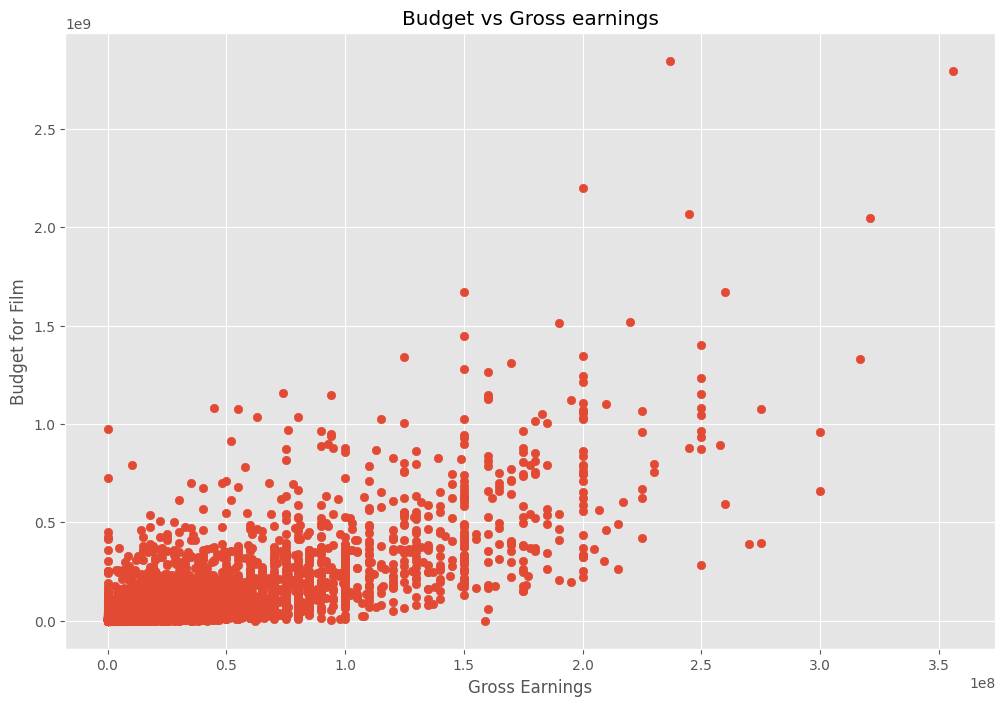

In [127]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show

In [128]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


## Regression Plot-seaborn-Budget vs gross 

<AxesSubplot: xlabel='budget', ylabel='gross'>

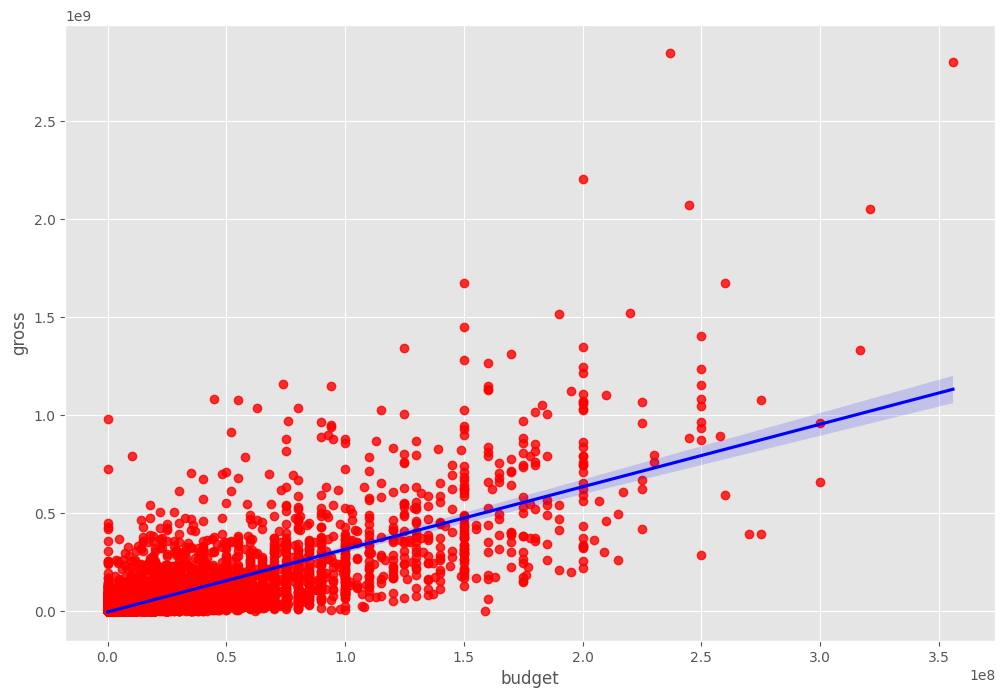

In [129]:
#using seaborn

sns.regplot(x='budget', y = 'gross', data =df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<br>

# Correlation

## Correlation : Numeric Features for Movies
- We produce something called Correlation matrix
- There are some methods in correlation as well, which you need to know before using it for your dataset.
- It makes all the difference with correlations. 
- NOTE => **This only comapares INT columns** 
- Different types are:
    1. Pearson => default one, which we are using
    2. Kendall
    3. Spearman

In [74]:
df.corr(method ='pearson') # other methods: Kendall, spearman

/var/folders/d2/8zsvd80x06j__s7ryt_ggr5h0000gn/T/ipykernel_20614/282719363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson') # other methods: Kendall, spearman


,year,score,votes,budget,gross,runtime,YearCorrect
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997415
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100597
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.217921
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.300066
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.255026
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.118017
YearCorrect,0.997415,0.100597,0.217921,0.300066,0.255026,0.118017,1.000000


## Visualization : Numeric features for Movies using Correlation matrix
- Makes it easier to understand the numbers

/var/folders/d2/8zsvd80x06j__s7ryt_ggr5h0000gn/T/ipykernel_20614/2839468785.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

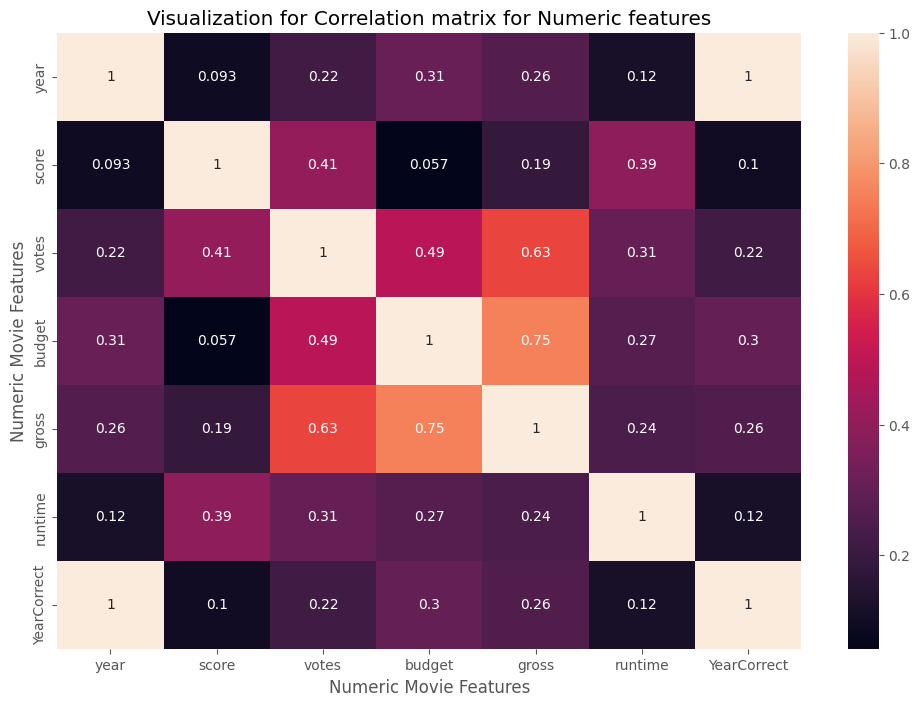

In [85]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Visualization for Correlation matrix for Numeric features')

plt.xlabel('Numeric Movie Features')

plt.ylabel('Numeric Movie Features')

plt.show

# Check the color bar for making informed decision using visual aid rather than checking against the numbers
# In below case: Black means really weak correlation 

## Correlation Complete Dataset
- I think Company is also going to have influence on gross revenue
- But company column isn't numeric.
- So what we do is we give every company an id and we use those ids for our correlations


In [116]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes # this gives object types some random numbers
df_numerized.head()

# This all is done so that we can do correlation with comapnies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,2009
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,2019
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,1997
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,2015
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,2018


In [130]:
# now if you want to see this in proper words
# run stuff from the top (excluding the graph parts)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


### Visualizing the whole dataset after converting stuff to int

- Now this tells us how much impact did something have on the movie
    - Example: how much impact did company have on gross revenue (company vs gross)

<function matplotlib.pyplot.show(close=None, block=None)>

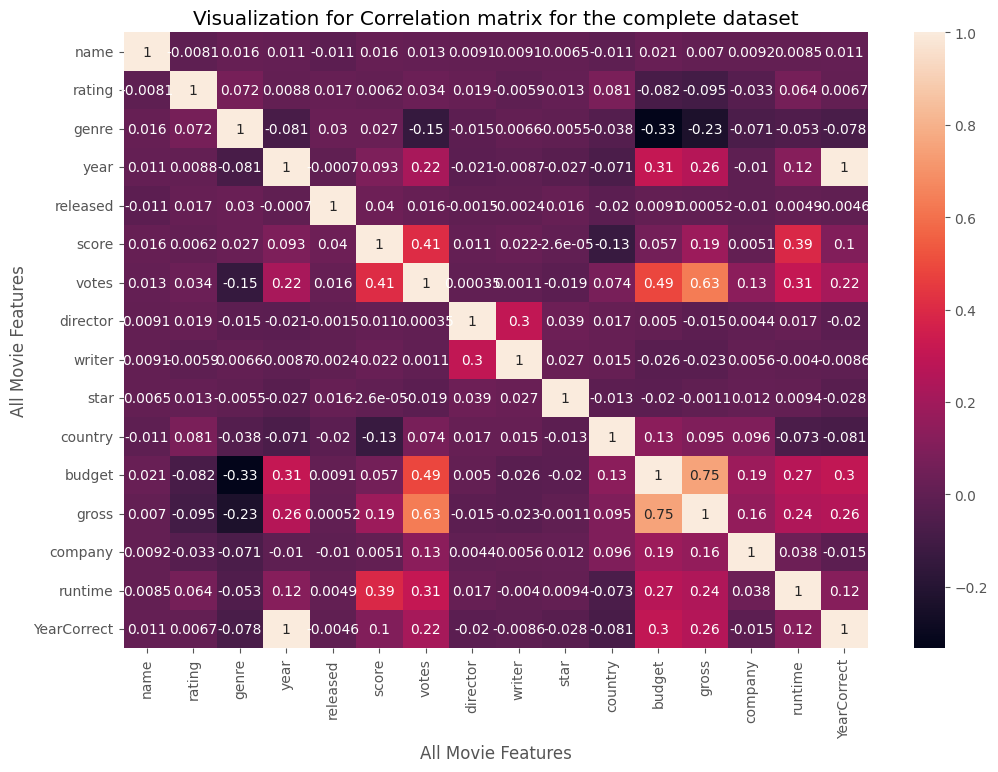

In [104]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True) 

plt.title('Visualization for Correlation matrix for the complete dataset')

plt.xlabel('All Movie Features')

plt.ylabel('All Movie Features')

plt.show

## Correlation - Matrix Format
- I personally prefer this because i can sort it according to my needs

In [138]:
df_numerized.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.010699
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.006741
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.077911
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.997415
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.004644


### Making matrix readable
- Basically we make pairs and use unstack to basically show it a linear way

In [137]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

### Pairing and sorting them up
- Pairing them basically gives us, **A vs B** situation for the whole dataset
- On top of that we can just sort it

In [135]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()
# basically A vs. B

budget  genre    -0.334021
genre   budget   -0.334021
        gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

### Only Highly Correlated things
- This it the reason i prefer matrix format because I can basically compare and eliminate unwanted stuff
- And obviously we can exclude stuff that are comparing against same things
    - i.e. A vs. A situation

In [136]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr.head()

gross   votes          0.632870
votes   gross          0.632870
gross   budget         0.750157
budget  gross          0.750157
year    YearCorrect    0.997415
dtype: float64

<br>

<br>

# Result
- **Votes and budget** have the **highest correlation to Gross Earnings**
- Suprisingly **Company (like Marvels, DC), and director (like James Cameron, Russo Brothers)** didn't have high correlation 